## **Original Image**



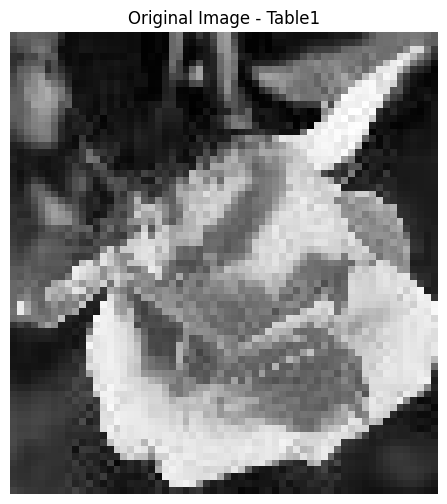

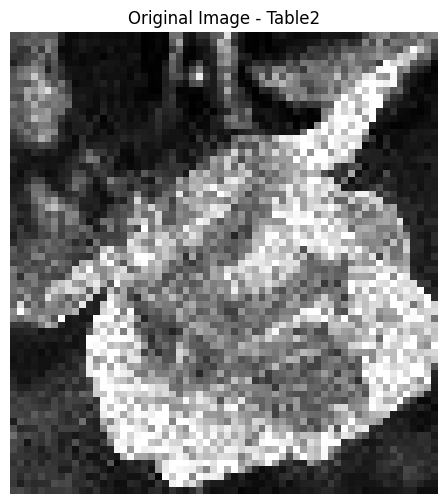

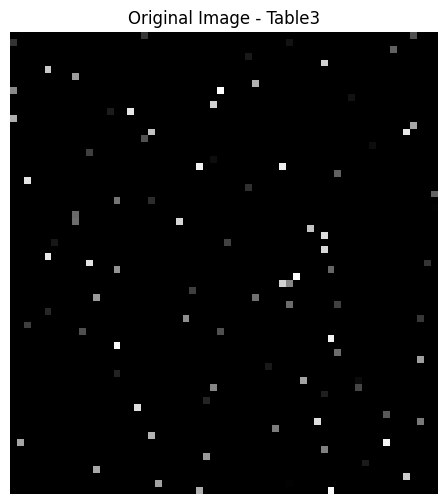

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def load_txt_data(file_path):
    """Load data from a text file."""
    return np.loadtxt(file_path)

# Define file paths for the datasets
file_paths = [
    '/content/Data Mining/Table1.txt',
    '/content/Data Mining/Table2.txt',
    '/content/Data Mining/Table3.txt'
]

# Load datasets from file paths
datasets = [load_txt_data(path) for path in file_paths]

# Plot original images
for i, data in enumerate(datasets):
    plt.figure(figsize=(6, 6))
    plt.imshow(data, cmap='gray', interpolation='nearest')
    plt.title(f'Original Image - Table{i+1}')
    plt.axis('off')
    plt.show()


## **Discrete Cosine Transform (DCT)**

Table1: Original Dimensions: (67, 62)
Significant Dimensions Retained: 17, Reconstruction Error: 0.004444707374205003


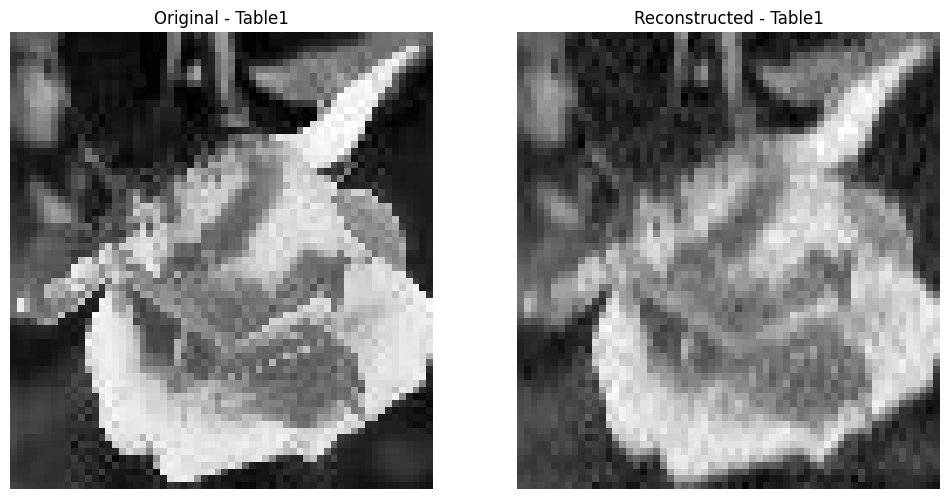

Table2: Original Dimensions: (67, 62)
Significant Dimensions Retained: 20, Reconstruction Error: 0.006447931457993709


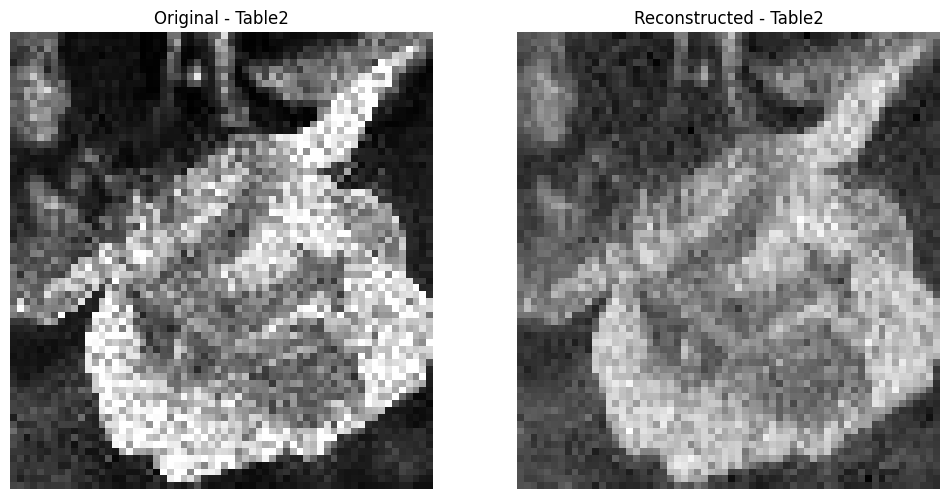

Table3: Original Dimensions: (67, 62)
Significant Dimensions Retained: 47, Reconstruction Error: 0.00017903008623298657


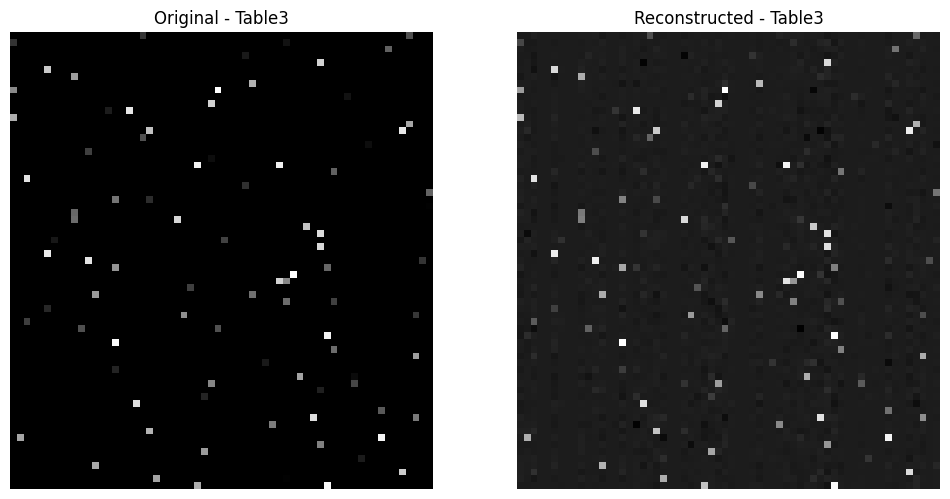

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

def read_data_from_text(file_path):
    """Read numerical data from a specified text file."""
    with open(file_path, 'r') as file:
        content = file.readlines()
    numeric_data = [list(map(float, row.split())) for row in content]
    return np.array(numeric_data)

def perform_dct_on_data(data):
    """Execute a one-dimensional Discrete Cosine Transform on dataset columns."""
    return dct(data, axis=0, norm='ortho')

def identify_key_coefficients(dct_transformed_data, threshold_for_energy=0.95):
    """Pinpoint essential DCT coefficients based on a specified energy retention threshold."""
    essential_dimensions = []
    for attribute_index in range(dct_transformed_data.shape[1]):
        energy_total = np.sum(dct_transformed_data[:, attribute_index] ** 2)
        energy_sorted = np.sort(dct_transformed_data[:, attribute_index] ** 2)[::-1]
        cumulative_energy = np.cumsum(energy_sorted)
        energy_cutoff = energy_total * threshold_for_energy
        essential_component_count = np.searchsorted(cumulative_energy, energy_cutoff) + 1
        essential_dimensions.append(essential_component_count)
    return max(essential_dimensions)

def eliminate_minor_coefficients(dct_transformed_data, dimensions_to_keep):
    """Eliminate less significant DCT coefficients beyond the number of dimensions to retain."""
    for column_index in range(dct_transformed_data.shape[1]):
        indices_to_zero = np.abs(dct_transformed_data[:, column_index]).argsort()[::-1]
        dct_transformed_data[indices_to_zero[dimensions_to_keep:], column_index] = 0
    return dct_transformed_data

def compute_error_between_original_and_reconstructed(original_data, reconstructed_data):
    """Calculate mean squared error between the original and reconstructed datasets."""
    return np.mean((original_data - reconstructed_data) ** 2)

# Specifying the paths to the dataset files
dataset_paths = [
    '/content/Data Mining/Table1.txt',
    '/content/Data Mining/Table2.txt',
    '/content/Data Mining/Table3.txt'
]

# Loading the data from the specified paths
loaded_datasets = [read_data_from_text(path) for path in dataset_paths]

# Iterating through each dataset for processing
for dataset, dataset_name in zip(loaded_datasets, ['Table1', 'Table2', 'Table3']):
    print(f"{dataset_name}: Original Dimensions: {dataset.shape}")

    # Applying the DCT
    dct_output = perform_dct_on_data(dataset)

    # Identifying and retaining significant coefficients
    significant_dimensions = identify_key_coefficients(dct_output)

    # Zeroing out less significant coefficients
    reduced_dct_data = eliminate_minor_coefficients(dct_output, significant_dimensions)

    # Reconstructing the dataset from the DCT output
    reconstructed_dataset = idct(reduced_dct_data, axis=0, norm='ortho')

    # Computing the reconstruction error
    error = compute_error_between_original_and_reconstructed(dataset, reconstructed_dataset)

    print(f"Significant Dimensions Retained: {significant_dimensions}, Reconstruction Error: {error}")

    # Displaying original and reconstructed datasets as images
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(dataset, cmap='gray', interpolation='nearest')
    plt.title(f'Original - {dataset_name}')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(reconstructed_dataset, cmap='gray', interpolation='None')
    plt.title(f'Reconstructed - {dataset_name}')
    plt.axis('off')

    plt.show()


## **Principal Component Analysis**


Analyzing Dataset 1:
Original Shape: (67, 62)
Components for 95% Variance: 17
MSE: 0.0454


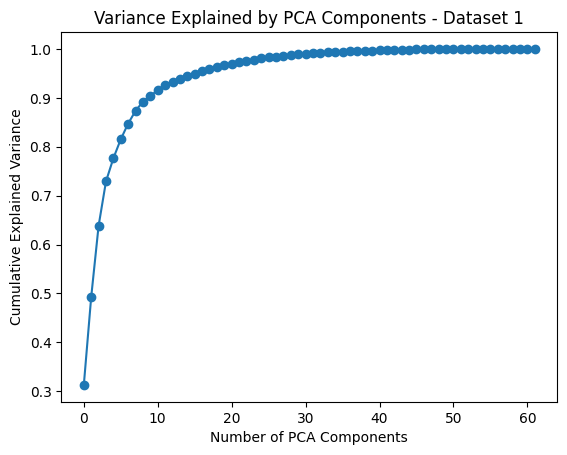


Analyzing Dataset 2:
Original Shape: (67, 62)
Components for 95% Variance: 25
MSE: 0.0489


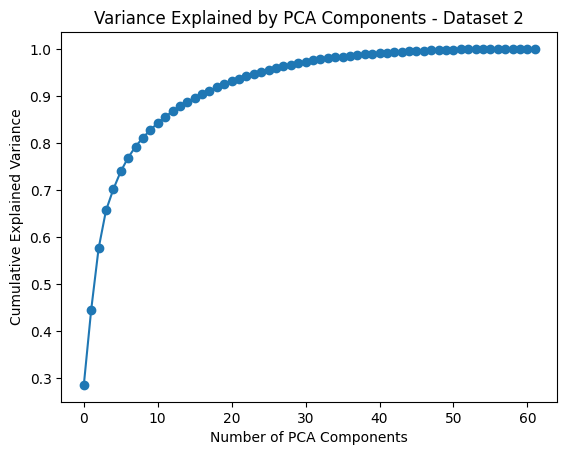


Analyzing Dataset 3:
Original Shape: (67, 62)
Components for 95% Variance: 38
MSE: 0.0663


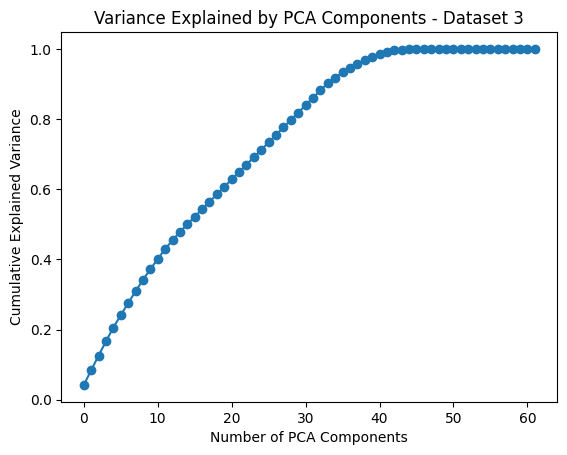

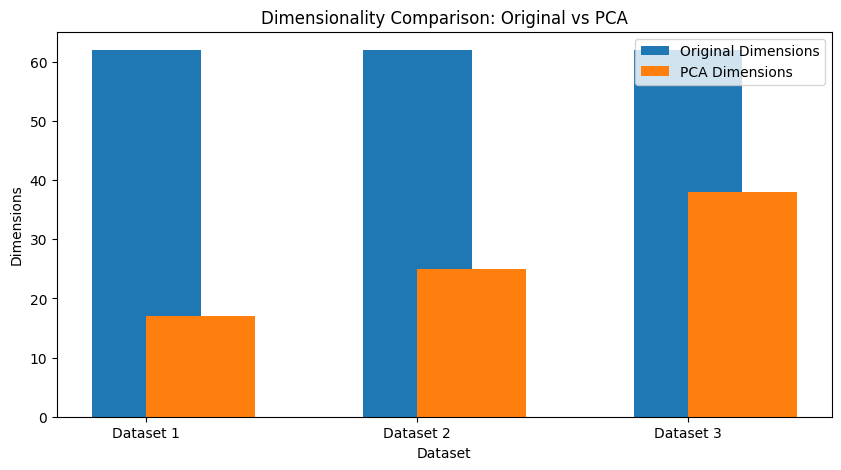


Dataset 1 - Efficiency: 0.9546, MSE: 0.0454

Dataset 2 - Efficiency: 0.9511, MSE: 0.0489

Dataset 3 - Efficiency: 0.9575, MSE: 0.0663


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def read_dataset(filepath):
    """Read numerical data from a text file."""
    with open(filepath, 'r') as file:
        content = [list(map(float, line.strip().split())) for line in file]
    return np.array(content)

# Paths to the dataset files
file_paths = [
    '/content/Data Mining/Table1.txt',
    '/content/Data Mining/Table2.txt',
    '/content/Data Mining/Table3.txt'
]

# Load the data from each file
datasets = [read_dataset(path) for path in file_paths]

# Initialize lists to store results
original_sizes = []
reduced_sizes = []
efficiencies = []
errors = []

# Analyze each dataset
for i, dataset in enumerate(datasets, 1):
    print(f"\nAnalyzing Dataset {i}:")
    print(f"Original Shape: {dataset.shape}")
    original_sizes.append(dataset.shape)

    # Normalize the dataset features
    scaler = StandardScaler()
    norm_dataset = scaler.fit_transform(dataset)

    # Perform PCA by calculating the covariance matrix and its eigendecomposition
    covariance_matrix = np.cov(norm_dataset, rowvar=False)
    eigenvals, eigenvecs = np.linalg.eig(covariance_matrix)
    eigenvals_sorted_idx = np.argsort(eigenvals)[::-1]

    # Calculate the explained variance ratio
    total_variance = sum(eigenvals)
    explained_variances = eigenvals[eigenvals_sorted_idx] / total_variance
    cumulative_variance = np.cumsum(explained_variances)

    # Determine the number of components for 95% variance
    n_components = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"Components for 95% Variance: {n_components}")

    # Project data onto the principal components
    principal_components = eigenvecs[:, eigenvals_sorted_idx[:n_components]]
    pca_data = np.dot(norm_dataset, principal_components)

    # Reconstruct data from PCA components
    pca_reconstructed = np.dot(pca_data, principal_components.T)

    # Calculate and print the MSE
    mse = np.mean((norm_dataset - pca_reconstructed) ** 2)
    errors.append(mse)
    print(f"MSE: {mse:.4f}")

    reduced_sizes.append(pca_data.shape)
    efficiencies.append(cumulative_variance[n_components - 1])

    # Display the variance explained by the components
    plt.figure()
    plt.plot(cumulative_variance, marker='o')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Variance Explained by PCA Components - Dataset {i}')
    plt.show()

# Compare original and reduced dimensions
plt.figure(figsize=(10, 5))
plt.bar(range(len(datasets)), [d[1] for d in original_sizes], width=0.4, label='Original Dimensions')
plt.bar(range(len(datasets)), [d[1] for d in reduced_sizes], width=0.4, label='PCA Dimensions', align='edge')
plt.xticks(range(len(datasets)), ['Dataset 1', 'Dataset 2', 'Dataset 3'])
plt.xlabel('Dataset')
plt.ylabel('Dimensions')
plt.title('Dimensionality Comparison: Original vs PCA')
plt.legend()
plt.show()

# Print final results
for i, (eff, err) in enumerate(zip(efficiencies, errors), 1):
    print(f"\nDataset {i} - Efficiency: {eff:.4f}, MSE: {err:.4f}")


## **SVD**

Table1: Original Dimensions: (67, 62)
Retained Dimension: 6, Reconstruction Error: 0.012831271489310021


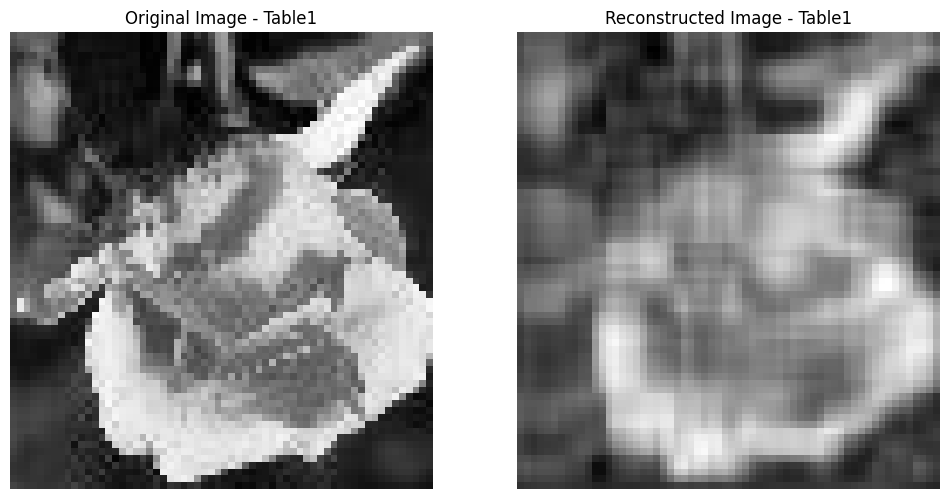

Table2: Original Dimensions: (67, 62)
Retained Dimension: 10, Reconstruction Error: 0.012891678815974993


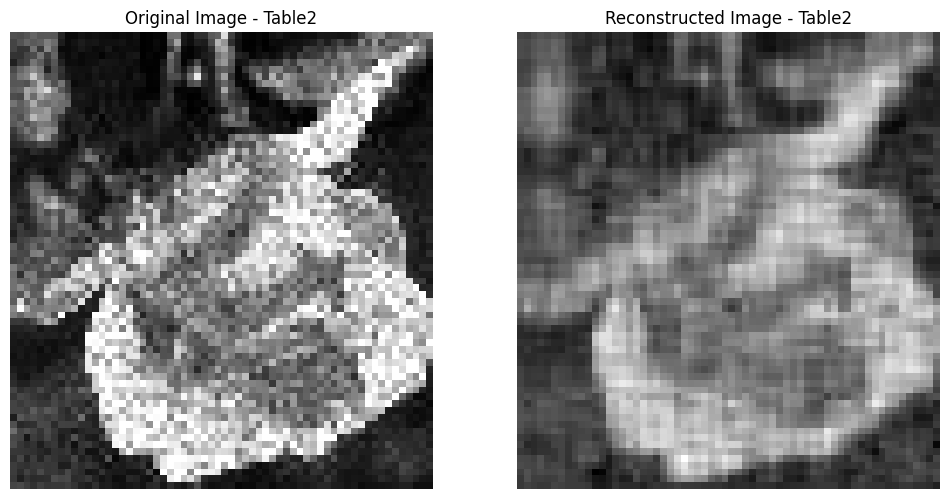

Table3: Original Dimensions: (67, 62)
Retained Dimension: 29, Reconstruction Error: 0.0003337283474987819


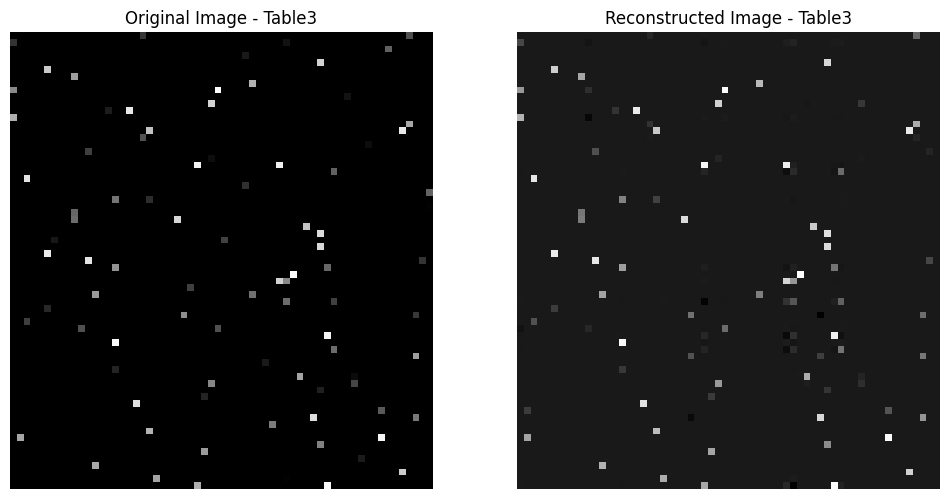

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

def load_txt_data(file_path):
    """Load data from a text file."""
    return np.loadtxt(file_path)

def apply_svd(data):
    """Apply Singular Value Decomposition (SVD) to the data."""
    U, s, Vt = svd(data, full_matrices=False)
    return U, s, Vt

def retain_significant_singular_values(s, energy_retained=0.95):
    """Determine the number of significant singular values based on the energy threshold."""
    total_energy = np.sum(s ** 2)
    cumulative_energy = np.cumsum(s ** 2)
    energy_threshold = total_energy * energy_retained
    n_components = np.searchsorted(cumulative_energy, energy_threshold) + 1
    return n_components

def zero_out_insignificant_singular_values(U, s, Vt, retained_dimension):
    """Zero out insignificant singular values beyond the specified retained dimension."""
    s[retained_dimension:] = 0
    return U, s, Vt

def reconstruct_data(U, s, Vt):
    """Reconstruct the data from the SVD components."""
    return np.dot(U, np.dot(np.diag(s), Vt))

def calculate_reconstruction_error(original_data, reconstructed_data):
    """Calculate the reconstruction error between original and reconstructed data."""
    return np.mean((original_data - reconstructed_data) ** 2)

# Define file paths for the datasets
file_paths = [
    '/content/Data Mining/Table1.txt',
    '/content/Data Mining/Table2.txt',
    '/content/Data Mining/Table3.txt'
]

# Load datasets from file paths
datasets = [load_txt_data(path) for path in file_paths]

# Process datasets
for data, name in zip(datasets, ['Table1', 'Table2', 'Table3']):
    print(f"{name}: Original Dimensions: {data.shape}")

    # Apply SVD
    U, s, Vt = apply_svd(data)

    # Determine retained dimension based on energy distribution
    retained_dimension = retain_significant_singular_values(s)

    # Zero out insignificant singular values
    U_reduced, s_reduced, Vt_reduced = zero_out_insignificant_singular_values(U, s, Vt, retained_dimension)

    # Reconstruct data using the retained SVD components
    reconstructed_data = reconstruct_data(U_reduced, s_reduced, Vt_reduced)

    # Calculate reconstruction error
    reconstruction_error = calculate_reconstruction_error(data, reconstructed_data)

    print(f"Retained Dimension: {retained_dimension}, Reconstruction Error: {reconstruction_error}")

    # Plot original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(data, cmap='gray', interpolation='nearest')
    plt.title(f'Original Image - {name}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_data, cmap='gray', interpolation='None')
    plt.title(f'Reconstructed Image - {name}')
    plt.axis('off')

    plt.show()
